In [143]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.DataFrame(data=load_diabetes().data, columns=load_diabetes().feature_names)
targets = pd.Series(data=load_diabetes().target)
df["Disease Progression"] = targets
df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [145]:
df["Disease Progression"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Disease Progression, dtype: float64

In [146]:
df = df.dropna()
X = df.drop(columns=["Disease Progression"])
df["category"] = pd.cut(df["Disease Progression"],bins=[0, 87., 140., 211., 346., np.inf],labels=["cat_1", "cat_2", "cat_3", "cat_4", "cat_5"])
y = df["category"]
y = pd.get_dummies(y)
y.head()


,cat_1,cat_2,cat_3,cat_4,cat_5
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


<AxesSubplot: >

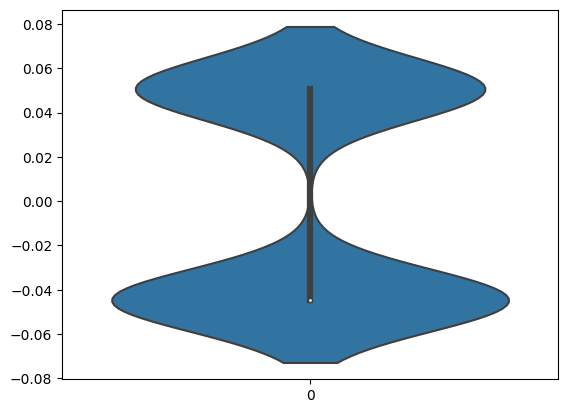

In [147]:
sns.violinplot(X["sex"])

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16848\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

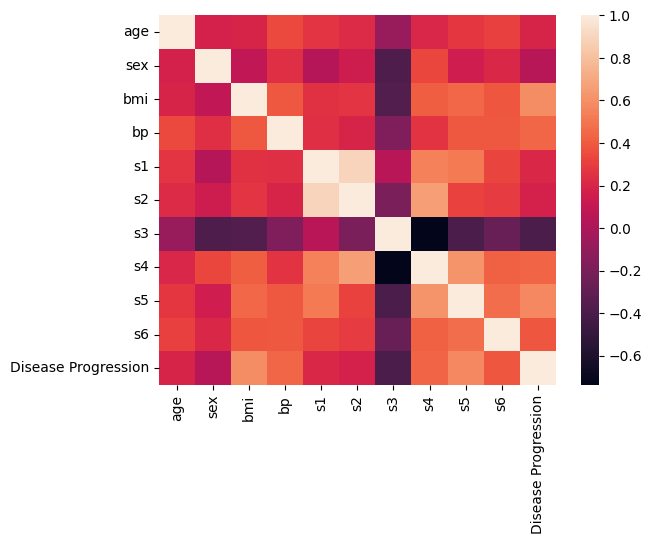

In [148]:
sns.heatmap(df.corr())

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [150]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm, tree


In [151]:
# "s_v_m":make_pipeline(svm.SVC(random_state=1234))  
#"s_v_m":{
#        "SVM__C" :[0.1, 0.5, 1, 10, 100],
#        "SVM__kernel" : ["linear", "poly", "rbf", "sigmoid", "precomputed" ]   
#    },

In [152]:
pipelines = {
    "tree_":make_pipeline(tree.DecisionTreeClassifier(random_state=1234)),
    
}
hypergrid = {
    "tree_" : {
    }
}


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [154]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for tree_.
tree_ has been successfully fit.


In [155]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
mcm = multilabel_confusion_matrix(y_pred, y_test)
for j, i in enumerate(mcm):
    print("Confusion Matrix for class {}".format(j + 1))
    print(i)

Confusion Matrix for class 1
[[81 17]
 [20 15]]
Confusion Matrix for class 2
[[74 22]
 [28  9]]
Confusion Matrix for class 3
[[75 26]
 [21 11]]
Confusion Matrix for class 4
[[88 16]
 [12 17]]
Confusion Matrix for class 5
[[133   0]
 [  0   0]]


In [156]:
y_test_np = y_test.to_numpy
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test_np, y_pred), annot = True, xticklabels = y_test_np.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TypeError: Expected sequence or array-like, got <class 'method'>

<Figure size 1800x800 with 0 Axes>